# Feature Selection: Bank Marketing Data Set

## Setting up: Install required packages

In [30]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn import metrics

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

### Read the data file

In [2]:
df = pd.read_csv('../Data/bank.csv')

In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

# Exploratory data analysis(EDA)

## Attribute information:

### Predictor variables: 

### Bank client data:
* age
* job 
* marital 
* education
* default 
* balance
* housing
* loan

### Related with the last contact of the current campaign:

* contact 
* duration 
* day 
* month
* campaign 

### About previous contacts/campaign:
* pdays 
* previous 
* poutcome (outcome of the previous marketing campaign: 'failure','nonexistent','success')

### Response variable:
* deposit (has the client subscribed a term deposit?'yes','no')


Reference: https://www.kaggle.com/janiobachmann/bank-marketing-dataset

### Check the dimension and data type of the data set

In [4]:
df.shape

(11162, 17)

In [5]:
df.sample(5)

age          job  marital  education default  balance housing loan  \
2875    29      student   single    unknown      no    10332      no   no   
5267    32       admin.  married   tertiary      no      284     yes   no   
7368    30   technician   single  secondary      no      458      no   no   
6405    30  blue-collar  married    primary      no        0     yes   no   
10557   55   unemployed  married  secondary      no     1436     yes   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
2875   cellular    2   nov        46         3     -1         0  unknown   
5267   cellular   29   apr       717         3     -1         0  unknown   
7368   cellular   20   nov        51         7     -1         0  unknown   
6405   cellular    6   may       239         2     -1         0  unknown   
10557  cellular    4   feb       969         2     -1         0  unknown   

      deposit  
2875      yes  
5267      yes  
7368       no  
6405       no  
10557      no

In [6]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

### Summary statistics

In [7]:
summary=df.describe().transpose()
print(summary)

            count         mean          std     min    25%    50%      75%  \
age       11162.0    41.231948    11.913369    18.0   32.0   39.0    49.00   
balance   11162.0  1528.538524  3225.413326 -6847.0  122.0  550.0  1708.00   
day       11162.0    15.658036     8.420740     1.0    8.0   15.0    22.00   
duration  11162.0   371.993818   347.128386     2.0  138.0  255.0   496.00   
campaign  11162.0     2.508421     2.722077     1.0    1.0    2.0     3.00   
pdays     11162.0    51.330407   108.758282    -1.0   -1.0   -1.0    20.75   
previous  11162.0     0.832557     2.292007     0.0    0.0    0.0     1.00   

              max  
age          95.0  
balance   81204.0  
day          31.0  
duration   3881.0  
campaign     63.0  
pdays       854.0  
previous     58.0  


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


## Missing data exploration: highlighting graphical presentation of missing pattern

#### Identifying the reason of “missingness” is very important. Missingness can occur for the following reasons: 
* It was forgotten or lost;
* It was not applicable to the instance;
* It is of no interest to the instance. 

##### A quick way to check for missing values is to try to drop them. If none drop, there are no missing values. The same goes for checking for duplicates

In [9]:
noNA = df.dropna()
noDupes = df.drop_duplicates()

print(noNA.shape)
print(noDupes.shape)

(11162, 17)
(11162, 17)


### Visual presentation of missing data pattern

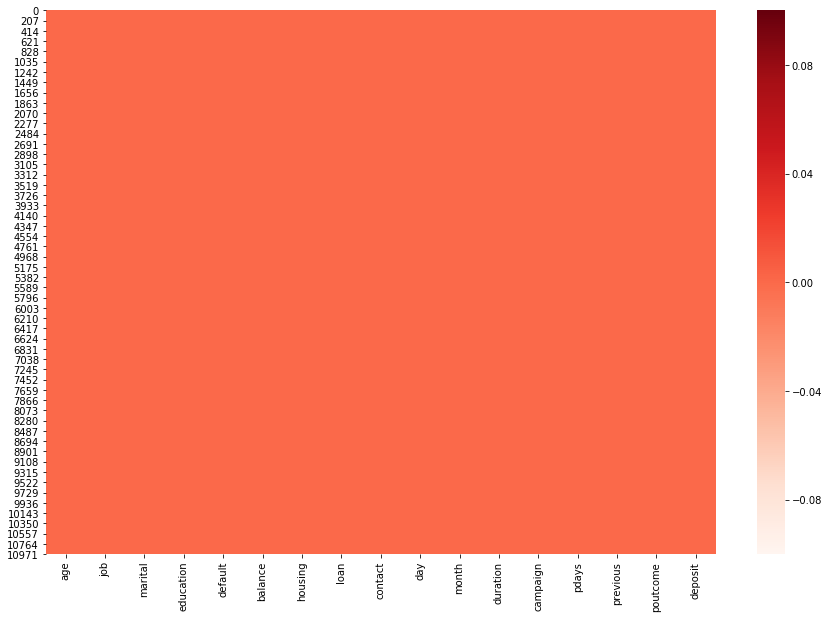

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(), cbar=True, cmap=plt.cm.Reds)
plt.show()

## Exploration of dependent(response) and predictor variables

In [11]:
sns.countplot(x='deposit', data=df)
plt.title('Histogram of Deposit\n',fontweight="bold")
plt.xlabel('deposit')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

In [12]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

## Exploration of numerical predictor variables

In [13]:
sns.pairplot(df, hue='deposit', palette="Set2", height=1.5)

### Visualize a correlation matrix using seaborn heat map

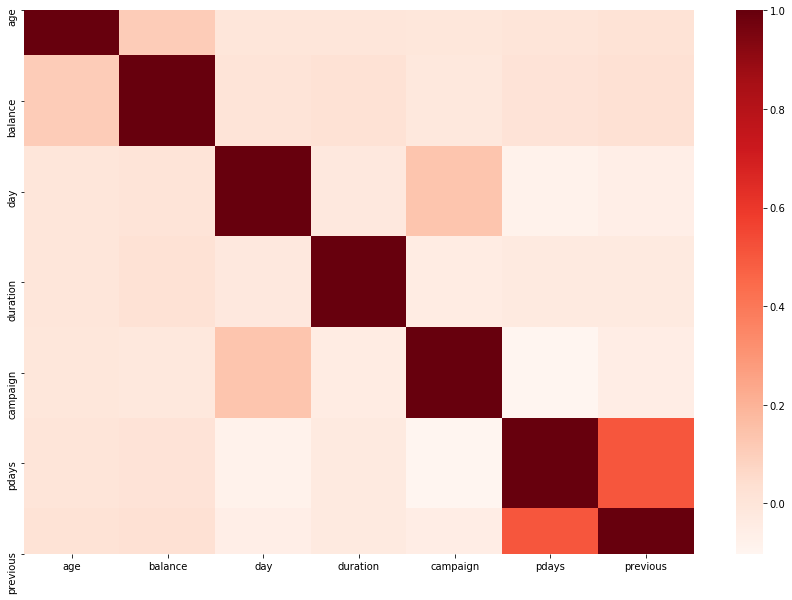

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=False, cmap=plt.cm.Reds)
plt.show()

## Exploration of categorical predictor variables

In [15]:
categorical = ['job', 'marital', 'education', 'default', 'housing','loan', 'contact', 'month','poutcome']

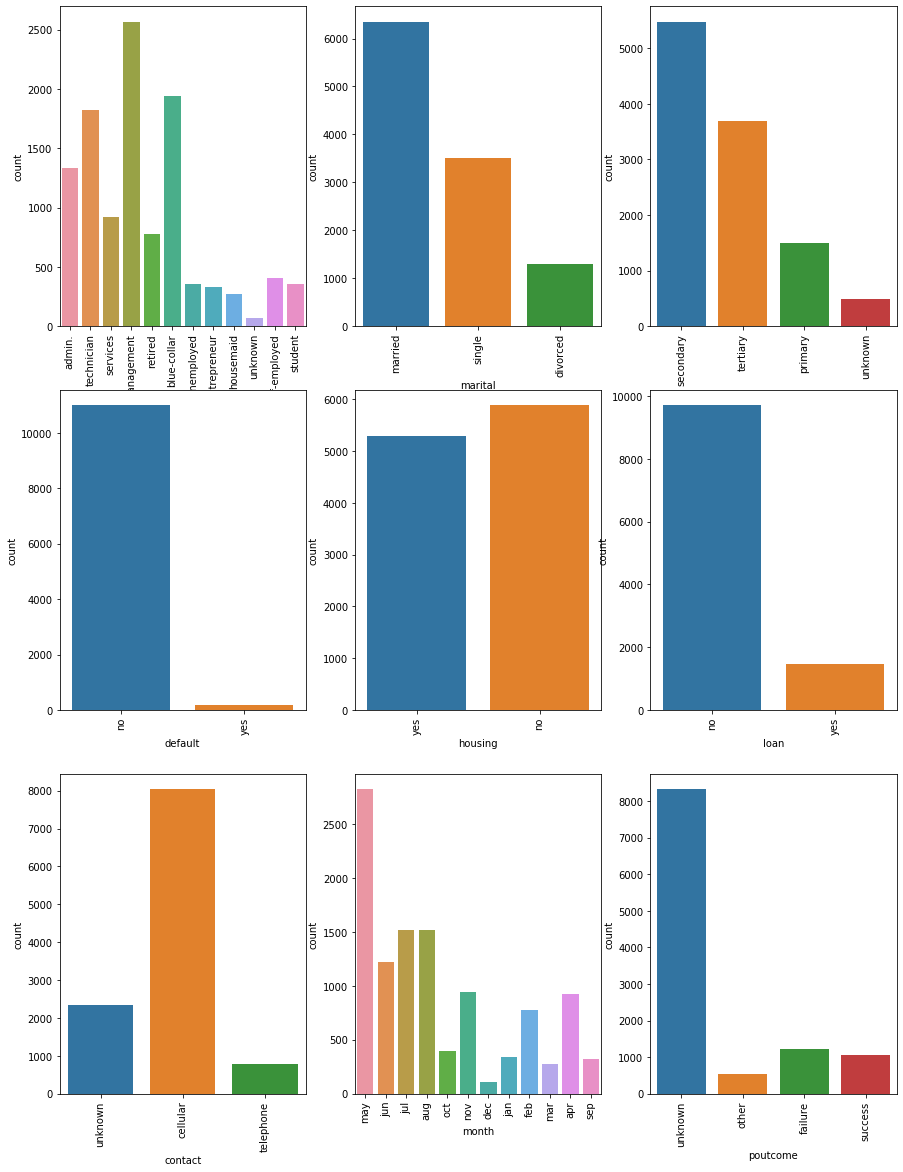

In [16]:
fig, ax = plt.subplots(3, 3, figsize=(15, 20))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

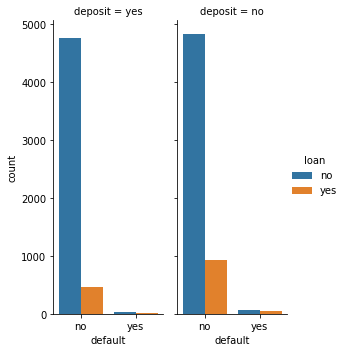

In [17]:
sns.catplot(x="default", hue="loan", col="deposit", data=df, kind="count",height=5, aspect=.4);

In [18]:
plt.figure(figsize=[15,5])
sns.countplot(x='job', hue='deposit', data=df)

 # Effects of feature selection techniques on classiﬁcation methods

### Data pre-processing

In [19]:
X = df.drop('deposit', axis=1)
Y = df.deposit
print(X.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')


In [20]:
XDummy = pd.get_dummies(X, drop_first=True)
XDummy.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [21]:
XDummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 42 columns):
age                    11162 non-null int64
balance                11162 non-null int64
day                    11162 non-null int64
duration               11162 non-null int64
campaign               11162 non-null int64
pdays                  11162 non-null int64
previous               11162 non-null int64
job_blue-collar        11162 non-null uint8
job_entrepreneur       11162 non-null uint8
job_housemaid          11162 non-null uint8
job_management         11162 non-null uint8
job_retired            11162 non-null uint8
job_self-employed      11162 non-null uint8
job_services           11162 non-null uint8
job_student            11162 non-null uint8
job_technician         11162 non-null uint8
job_unemployed         11162 non-null uint8
job_unknown            11162 non-null uint8
marital_married        11162 non-null uint8
marital_single         11162 non-null uint8
education_s

In [22]:
XDummy.shape

(11162, 42)

In [23]:
yDummy = pd.get_dummies(Y, drop_first=True)

## Feature selection using random forest

In [24]:
skf = StratifiedKFold(n_splits=5)
for trainIndex, textIndex in skf.split(XDummy, yDummy):
    xTrain, xTest = XDummy.iloc[trainIndex], XDummy.iloc[textIndex]
    yTrain, yTest = yDummy.iloc[trainIndex], yDummy.iloc[textIndex]
    clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
    clf.fit(xTrain, yTrain.values.ravel())  
    yPred = clf.predict(xTest)
    
print("F1 score: ", f1_score(yPred,yTest))   
print("Balanced accuracy:", balanced_accuracy_score(yTest, yPred))
mapped=zip(clf.feature_importances_, XDummy.columns)
mapped = set(mapped)
sortedList = sorted(mapped)[::-1]
sortedList[:-1]

F1 score:  0.6512904997254256
Balanced accuracy: 0.7076829411774187


[(0.2167965331591607, 'duration'),
 (0.14815614979472783, 'poutcome_success'),
 (0.10297684914758905, 'contact_unknown'),
 (0.09519593567617984, 'poutcome_unknown'),
 (0.09234062056291382, 'housing_yes'),
 (0.08064623583834045, 'pdays'),
 (0.062491152947118815, 'previous'),
 (0.03948820835106938, 'age'),
 (0.03894428765645712, 'month_may'),
 (0.02254485799356589, 'balance'),
 (0.021457574648915026, 'month_mar'),
 (0.019313269483067223, 'campaign'),
 (0.013241133684867193, 'loan_yes'),
 (0.009799617109018633, 'month_oct'),
 (0.007506390021900286, 'job_blue-collar'),
 (0.004877429155501306, 'month_sep'),
 (0.0048134567075765215, 'education_tertiary'),
 (0.0028751921909582127, 'marital_single'),
 (0.0027320671241552103, 'marital_married'),
 (0.0027025750023648774, 'day'),
 (0.002555450961344535, 'job_student'),
 (0.0020734924456203563, 'job_retired'),
 (0.0019749388875299773, 'month_jul'),
 (0.00116104564151153, 'month_jun'),
 (0.0010921042210890396, 'month_nov'),
 (0.0008813193337986743,

Feature ranking:
1. feature 3 (0.216797)
2. feature 40 (0.148156)
3. feature 27 (0.102977)
4. feature 41 (0.095196)
5. feature 24 (0.092341)
6. feature 5 (0.080646)
7. feature 6 (0.062491)
8. feature 0 (0.039488)
9. feature 35 (0.038944)
10. feature 1 (0.022545)
11. feature 34 (0.021458)
12. feature 4 (0.019313)
13. feature 25 (0.013241)
14. feature 37 (0.009800)
15. feature 7 (0.007506)
16. feature 38 (0.004877)
17. feature 21 (0.004813)
18. feature 19 (0.002875)
19. feature 18 (0.002732)
20. feature 2 (0.002703)
21. feature 14 (0.002555)
22. feature 11 (0.002073)
23. feature 32 (0.001975)
24. feature 33 (0.001161)
25. feature 36 (0.001092)
26. feature 13 (0.000881)
27. feature 31 (0.000734)
28. feature 29 (0.000245)
29. feature 28 (0.000225)
30. feature 8 (0.000096)
31. feature 9 (0.000062)
32. feature 39 (0.000000)
33. feature 16 (0.000000)
34. feature 10 (0.000000)
35. feature 12 (0.000000)
36. feature 15 (0.000000)
37. feature 17 (0.000000)
38. feature 22 (0.000000)
39. feature 23

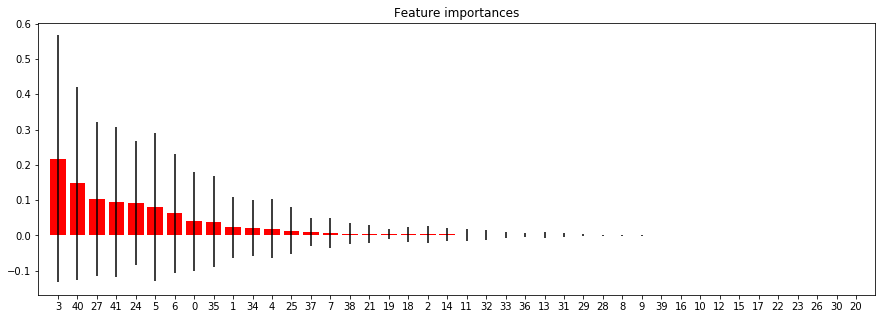

In [25]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(xTrain.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=[15,5])
#plt.figure()
plt.title("Feature importances")
plt.bar(range(xTrain.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(xTrain.shape[1]), indices)
plt.xlim([-1, xTrain.shape[1]])
plt.show()

In [26]:
sfm_rf = SelectFromModel(clf, threshold=0.06)
model_rf=sfm_rf.fit(xTrain, yTrain.values.ravel())
 
# Printing the names of the most important features
for feature_list_index in sfm_rf.get_support(indices=True):
    print( XDummy.columns[feature_list_index])

duration
pdays
previous
housing_yes
contact_unknown
poutcome_success
poutcome_unknown


### Random forest on selected features using ScikitLearn 

In [27]:
X_best_train_rf = sfm_rf.transform(xTrain)
X_best_test_rf = sfm_rf.transform(xTest)

In [28]:
clf_best_rf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
clf_best_rf.fit(X_best_train_rf,yTrain.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [31]:
y_best_pred_rf = clf_best_rf.predict(X_best_test_rf)
y_train_pred_rf = clf_best_rf.predict(X_best_train_rf)
print('Training balanced accuracy on selected features:', balanced_accuracy_score(yTrain, y_train_pred_rf))
print("Test balanced accuracy:", balanced_accuracy_score(yTest, y_best_pred_rf))
print("F1 score: ", f1_score(y_best_pred_rf,yTest))   
print('Training 5-fold cross-validation score on selected features:', np.mean(cross_val_score(clf_best_rf,X_best_train_rf, yTrain, cv=5)))
print('Testing 5-fold cross-validation score on selected features:', np.mean(cross_val_score(clf_best_rf,X_best_test_rf, yTest, cv=5)))

Training balanced accuracy on selected features: 0.9001017440866435
Test balanced accuracy: 0.754069970779697
F1 score:  0.7427230046948357


c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\user

Training 5-fold cross-validation score on selected features: 0.7245726150750275


c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\user

Testing 5-fold cross-validation score on selected features: 0.7261277678040139


### Logistic regression on selected features using ScikitLearn 

In [32]:
logreg_rf = LogisticRegression()
logreg_rf.fit(X_best_train_rf, yTrain)
y_logpred_rf = logreg_rf.predict(X_best_test_rf)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_rf.score(X_best_test_rf, yTest)))

Accuracy of logistic regression classifier on test set: 0.79


c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
confusion_matrix_rf = confusion_matrix(yTest, y_logpred_rf)
print(confusion_matrix_rf)

[[978 196]
 [276 781]]


In [34]:
sns.heatmap(pd.DataFrame(confusion_matrix_rf), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 15.0, 'Predicted label')

In [35]:
print(classification_report(yTest, y_logpred_rf))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81      1174
           1       0.80      0.74      0.77      1057

    accuracy                           0.79      2231
   macro avg       0.79      0.79      0.79      2231
weighted avg       0.79      0.79      0.79      2231



## Feature selection using extra trees classifier

In [37]:
skf_et = StratifiedKFold(n_splits=5)

for trainIndex, textIndex in skf_et.split(XDummy, yDummy):
    xTrain_et, xTest_et = XDummy.iloc[trainIndex], XDummy.iloc[textIndex]
    yTrain_et, yTest_et = yDummy.iloc[trainIndex], yDummy.iloc[textIndex]
    
    clf_et = ExtraTreesClassifier(n_estimators=100)
    clf_et.fit(xTrain_et, yTrain_et.values.ravel())  
    
    yPred_et = clf_et.predict(xTest_et)

print("F1 score: ", f1_score(yPred_et,yTest_et))   
print("Balanced accuracy:", balanced_accuracy_score(yTest_et, yPred_et))
mapped_et=zip(clf_et.feature_importances_, XDummy.columns)
mapped_et = set(mapped_et)
sortedList_et = sorted(mapped_et)[::-1]
sortedList_et[:-1]

F1 score:  0.806282722513089
Balanced accuracy: 0.8167610591513702


[(0.25370855407590037, 'duration'),
 (0.07475226984761862, 'day'),
 (0.07138137304723877, 'balance'),
 (0.07137375407520316, 'age'),
 (0.05093902586121, 'campaign'),
 (0.04532427220401446, 'poutcome_success'),
 (0.04027639780700675, 'contact_unknown'),
 (0.032037457632982914, 'housing_yes'),
 (0.024700198473864794, 'poutcome_unknown'),
 (0.020940907370016103, 'pdays'),
 (0.016090348069404042, 'loan_yes'),
 (0.0152363350462285, 'month_may'),
 (0.015029766367129327, 'education_secondary'),
 (0.015017817542452799, 'marital_married'),
 (0.014633199480609317, 'month_aug'),
 (0.014480043859365634, 'previous'),
 (0.01341345189107096, 'job_technician'),
 (0.013096201822208428, 'month_jul'),
 (0.01267986569615001, 'month_jun'),
 (0.012372841546367797, 'month_mar'),
 (0.01228190008328504, 'education_tertiary'),
 (0.01224653196941538, 'month_nov'),
 (0.012185274488922298, 'marital_single'),
 (0.01194545336766214, 'job_management'),
 (0.011488463300834919, 'month_oct'),
 (0.011137361181477113, 'jo

Feature ranking:
1. feature 3 (0.253709)
2. feature 2 (0.074752)
3. feature 1 (0.071381)
4. feature 0 (0.071374)
5. feature 4 (0.050939)
6. feature 40 (0.045324)
7. feature 27 (0.040276)
8. feature 24 (0.032037)
9. feature 41 (0.024700)
10. feature 5 (0.020941)
11. feature 25 (0.016090)
12. feature 35 (0.015236)
13. feature 20 (0.015030)
14. feature 18 (0.015018)
15. feature 28 (0.014633)
16. feature 6 (0.014480)
17. feature 15 (0.013413)
18. feature 32 (0.013096)
19. feature 33 (0.012680)
20. feature 34 (0.012373)
21. feature 21 (0.012282)
22. feature 36 (0.012247)
23. feature 19 (0.012185)
24. feature 10 (0.011945)
25. feature 37 (0.011488)
26. feature 7 (0.011137)
27. feature 26 (0.010924)
28. feature 30 (0.009199)
29. feature 38 (0.008869)
30. feature 13 (0.008335)
31. feature 31 (0.008299)
32. feature 11 (0.007614)
33. feature 22 (0.006391)
34. feature 14 (0.006336)
35. feature 12 (0.006043)
36. feature 16 (0.005923)
37. feature 39 (0.005612)
38. feature 8 (0.005351)
39. feature 9

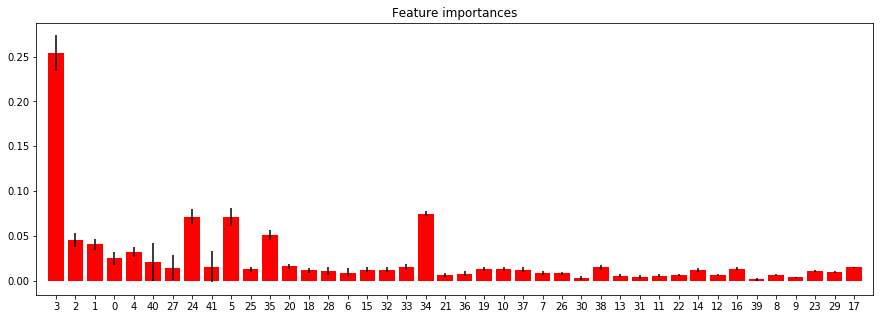

In [38]:
importances_et = clf_et.feature_importances_
std_et = np.std([tree.feature_importances_ for tree in clf_et.estimators_],
             axis=0)
indices_et = np.argsort(importances_et)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(xTrain_et.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices_et[f], importances_et[indices_et[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=[15,5])
#plt.figure()
plt.title("Feature importances")
plt.bar(range(xTrain_et.shape[1]), importances_et[indices],
       color="r", yerr=std_et[indices_et], align="center")
plt.xticks(range(xTrain_et.shape[1]), indices_et)
plt.xlim([-1, xTrain_et.shape[1]])
plt.show()

In [39]:
sfm_et = SelectFromModel(clf_et, threshold=0.04)
model_et=sfm_et.fit(xTrain_et, yTrain_et.values.ravel())
 
# Printing the names of the most important features
for feature_list_index in sfm_et.get_support(indices=True):
    print( XDummy.columns[feature_list_index])

age
balance
day
duration
campaign
contact_unknown
poutcome_success


### Random forest on selected features using ScikitLearn 

In [40]:
X_best_train_et = sfm_et.transform(xTrain_et)
X_best_test_et = sfm_et.transform(xTest_et)

In [41]:
clf_best_et = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=0, n_jobs=-1)
clf_best_et.fit(X_best_train_et,yTrain_et.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

In [42]:
y_best_pred_et = clf_best_et.predict(X_best_test_et)
y_train_pred_et = clf_best_et.predict(X_best_train_et)
print("OBB score:", clf_best_et.oob_score_)
print('Training balanced accuracy on selected features:', balanced_accuracy_score(yTrain_et, y_train_pred_et))
print("Test balanced accuracy:", balanced_accuracy_score(yTest_et, y_best_pred_et))
print("F1 score: ", f1_score(y_best_pred_et,yTest_et))   
print('Training 5-fold cross-validation score on selected features:', np.mean(cross_val_score(clf_best_et,X_best_train_et, yTrain_et, cv=5)))
print('Testing 5-fold cross-validation score on selected features:', np.mean(cross_val_score(clf_best_et,X_best_test_et, yTest_et, cv=5)))

OBB score: 0.8074123838315979
Training balanced accuracy on selected features: 1.0
Test balanced accuracy: 0.7977356279786416
F1 score:  0.7913403961308152


c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\user

Training 5-fold cross-validation score on selected features: 0.7618592054732384


c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\user

Testing 5-fold cross-validation score on selected features: 0.7911252490951755


### Logistic regression on selected features using ScikitLearn 

In [43]:
logreg_et = LogisticRegression()
logreg_et.fit(X_best_train_et, yTrain_et)
y_logpred_et = logreg_et.predict(X_best_test_et)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_et.score(X_best_test_et, yTest_et)))


Accuracy of logistic regression classifier on test set: 0.77


c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
confusion_matrix_et = confusion_matrix(yTest_et, y_logpred_et)
print(confusion_matrix_et)

[[983 191]
 [311 746]]


In [45]:
sns.heatmap(pd.DataFrame(confusion_matrix_et), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 15.0, 'Predicted label')

In [46]:
print(classification_report(yTest_et, y_logpred_et))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80      1174
           1       0.80      0.71      0.75      1057

    accuracy                           0.77      2231
   macro avg       0.78      0.77      0.77      2231
weighted avg       0.78      0.77      0.77      2231



### Feature selection using linear support vector classification

In [47]:
from sklearn.svm import LinearSVC

In [48]:
skf_sv = StratifiedKFold(n_splits=5)
for trainIndex, textIndex in skf.split(XDummy, yDummy):
    xTrain_sv, xTest_sv = XDummy.iloc[trainIndex], XDummy.iloc[textIndex]
    yTrain_sv, yTest_sv = yDummy.iloc[trainIndex], yDummy.iloc[textIndex]
    clf_sv = LinearSVC(C=0.0001, penalty="l1", dual=False)
    clf_sv.fit(xTrain, yTrain.values.ravel())  
    yPred_sv = clf_sv.predict(xTest)
    
print("F1 score: ", f1_score(yPred_sv,yTest_sv))   
print("Balanced accuracy:", balanced_accuracy_score(yTest_sv, yPred_sv))
mapped_sv=zip(clf_sv.intercept_, XDummy.columns)
mapped_sv = set(mapped)
sortedList_sv = sorted(mapped)[::-1]
sortedList_sv[:-1]
    
 

F1 score:  0.6769383697813122
Balanced accuracy: 0.7054430671486754


[(0.2167965331591607, 'duration'),
 (0.14815614979472783, 'poutcome_success'),
 (0.10297684914758905, 'contact_unknown'),
 (0.09519593567617984, 'poutcome_unknown'),
 (0.09234062056291382, 'housing_yes'),
 (0.08064623583834045, 'pdays'),
 (0.062491152947118815, 'previous'),
 (0.03948820835106938, 'age'),
 (0.03894428765645712, 'month_may'),
 (0.02254485799356589, 'balance'),
 (0.021457574648915026, 'month_mar'),
 (0.019313269483067223, 'campaign'),
 (0.013241133684867193, 'loan_yes'),
 (0.009799617109018633, 'month_oct'),
 (0.007506390021900286, 'job_blue-collar'),
 (0.004877429155501306, 'month_sep'),
 (0.0048134567075765215, 'education_tertiary'),
 (0.0028751921909582127, 'marital_single'),
 (0.0027320671241552103, 'marital_married'),
 (0.0027025750023648774, 'day'),
 (0.002555450961344535, 'job_student'),
 (0.0020734924456203563, 'job_retired'),
 (0.0019749388875299773, 'month_jul'),
 (0.00116104564151153, 'month_jun'),
 (0.0010921042210890396, 'month_nov'),
 (0.0008813193337986743,

In [49]:
sfm_sv = SelectFromModel(clf_sv,prefit=True)
model_sv=sfm_et.fit(xTrain_sv, yTrain_sv.values.ravel())
 
# Printing the names of the most important features
for feature_list_index in sfm_sv.get_support(indices=True):
    print( XDummy.columns[feature_list_index])

age
balance
day
duration
pdays


### Random forest on selected features using ScikitLearn 

In [50]:
X_best_train_sv = sfm_sv.transform(xTrain_sv)
X_best_test_sv = sfm_sv.transform(xTest_sv)

In [51]:
clf_best_sv = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=0, n_jobs=-1)
clf_best_sv.fit(X_best_train_sv,yTrain_sv.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

In [52]:
y_best_pred_sv = clf_best_sv.predict(X_best_test_sv)
y_train_pred_sv = clf_best_sv.predict(X_best_train_sv)
print("OBB score:", clf_best_sv.oob_score_)
print('Training balanced accuracy on selected features:', balanced_accuracy_score(yTrain_sv, y_train_pred_sv))
print("Test balanced accuracy:", balanced_accuracy_score(yTest_sv, y_best_pred_sv))
print("F1 score: ", f1_score(y_best_pred_sv,yTest_sv))   
print('Training 5-fold cross-validation score on selected features:', np.mean(cross_val_score(clf_best_sv,X_best_train_sv, yTrain_sv, cv=5)))
print('Testing 5-fold cross-validation score on selected features:', np.mean(cross_val_score(clf_best_sv,X_best_test_sv, yTest_sv, cv=5)))

OBB score: 0.7961034598589184
Training balanced accuracy on selected features: 0.9998818525519848
Test balanced accuracy: 0.7903116886047266
F1 score:  0.7800282618935469


c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\user

Training 5-fold cross-validation score on selected features: 0.7691246917725463


c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\user

Testing 5-fold cross-validation score on selected features: 0.7664826301519826


### Logistic regression on selected features using ScikitLearn 

In [53]:
logreg_sv = LogisticRegression()
logreg_sv.fit(X_best_train_sv, yTrain_sv)
y_logpred_sv = logreg_sv.predict(X_best_test_sv)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_sv.score(X_best_test_sv, yTest_sv)))

Accuracy of logistic regression classifier on test set: 0.72


c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
confusion_matrix_sv = confusion_matrix(yTest_sv, y_logpred_sv)
print(confusion_matrix_sv)

[[945 229]
 [393 664]]


Text(0.5, 15.0, 'Predicted label')

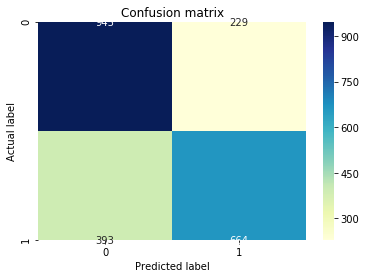

In [55]:
sns.heatmap(pd.DataFrame(confusion_matrix_sv), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [56]:
print(classification_report(yTest_sv, y_logpred_sv))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      1174
           1       0.74      0.63      0.68      1057

    accuracy                           0.72      2231
   macro avg       0.72      0.72      0.72      2231
weighted avg       0.72      0.72      0.72      2231



## Results

In this assignment,  we have implemented random forest,  extra forest and linear support vector classifies to perform feature selection on bank marketing data. We have used 5- fold cross-validation to avoid overfitting. Logistic regression and random forest models were used on selective features to assess the effectiveness of the feature selection techniques. These models were evaluated through f1 scores and  5-fold cross-validation scores. Features importance scores and OBB errors were also computed to perform comprehensive analysis.  All computations were implemented on ScikitLearn.F-1 score and balanced accuracy were higher for all predictors while using extra trees classifier.  Balanced accuracy was 100% on the training set as well while using selective predictors. Linear support vector classifiers gave balanced accuracy around 79% on the test data. F1 score on the test data was reasonable in this model. 5-fold cross-validation scores were higher both on test and training sets compared to the other two classifiers. It was also noticeable from the feature importance scores that age, balance, and duration had significant predictive capability. From the above analysis, it is obvious that the linear support vector classifier performed well both on the test and training set. It was surprising that the predictive performance of the random forest classifiers was poor. In light of this analysis, we can conclude that predicting whether the campaign will be successful to a certain client, namely, whether the client will subscribe a term deposit heavily depends on the phone call and their age, and account balance.